# Import Libraries

In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

# Preprocess

In [46]:
# Get the preprocessed X and y from the data.
def get_X_y():
    # Read in data.
    df = pd.read_csv('data/Boats_Cleaned_dataset.csv')
    df = df.fillna(0)

    # Delete selected rows with NaN.
    df = df[pd.to_numeric(df['zip'], errors='coerce').notnull()]
    df['zip'] = df['zip'].astype(int)
    df = df.drop(df[df['zip']==0].index)
    df = df.drop(df[df['engineCategory']==0].index)
    df = df.drop(df[df['beam_ft']==0].index)
    df = df.drop(df[df['totalHP']==0].index)

    # Delete selected columns with NaN
    df = df.drop(['Unnamed: 0','created_date','id','maxEngineYear','minEngineYear','dryWeight_lb', 'make', 'model','city','sellerId'],axis=1)

    # Define features and target.
    X0 = df.drop(['price'], axis=1)
    y0 = df.price

    # Standardize
    X_n = X0.select_dtypes(include='number')
    X_c = X0.select_dtypes(exclude='number')
    X_n = StandardScaler().set_output(transform='pandas').fit_transform(X_n)

    # Hot Encode
    X_c = pd.get_dummies(X_c, drop_first = False) #dropped first
    df = pd.concat([X_n,X_c,y0],axis=1)

    # Redefine features and target
    X = df.drop(['price'],axis=1)
    y = df.price

    return (X, y)

In [47]:
X, y = get_X_y()
print(X.shape)

(5752, 142)


# Train Test Split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Feature Engineer, d=2

In [49]:
poly = PolynomialFeatures(2,interaction_only=False,include_bias=False)
Xe_train = poly.fit_transform(X_train)
cols = poly.get_feature_names_out(X_train.columns)
Xe_train = pd.DataFrame(Xe_train, columns=cols)
# Xe_train = stnd.fit_transform(Xe_train)
Xe_train['bias'] = 1
print(Xe_train.shape)
Xe_train.head()

Xe_test = poly.fit_transform(X_test)
cols = poly.get_feature_names_out(X_test.columns)
Xe_test = pd.DataFrame(Xe_test, columns=cols)
# Xe_test = stnd.transform(Xe_test)
Xe_test['bias'] = 1
Xe_test.head()

(4601, 10296)


,year,length_ft,beam_ft,numEngines,totalHP,zip,created_month,created_year,type_power,type_sail,...,state_VT state_WA,state_VT state_WI,state_VT state_WV,state_WA^2,state_WA state_WI,state_WA state_WV,state_WI^2,state_WI state_WV,state_WV^2,bias
0,0.459450,0.367392,-0.046988,-0.384248,-0.022364,0.016842,-0.624789,0.669243,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.050196,-0.588427,-0.278693,-0.384248,-0.349689,-1.443551,1.187661,-0.442682,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.357137,-0.800832,-0.697436,-0.384248,-0.677015,-1.698533,0.885586,-1.554608,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.357137,-0.800832,-0.069321,-0.384248,-0.563162,0.924080,1.791810,-2.666533,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.459450,-0.269821,-0.094445,1.745032,0.973844,-0.594695,1.791810,-0.442682,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Use Lasso for feature selection

In [54]:
# regularize
grid = {'alpha':[380,390, 400]}
lasso = Lasso()
lassoCV = GridSearchCV(lasso,param_grid=grid,return_train_score=True)
# lassoCV = cross_validate(lasso, return_train_score=True)
lassoCV.fit(Xe_train,y_train)

print()
print('best alpha =',lassoCV.best_params_, '  valid R2 =',lassoCV.best_score_.round(3))

C:\Users\schrocjq\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.481e+10, tolerance: 1.522e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\schrocjq\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.477e+11, tolerance: 1.426e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\schrocjq\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

C:\Users\schrocjq\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.590e+11, tolerance: 1.426e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\schrocjq\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.232e+10, tolerance: 1.330e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\schrocjq\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi


best alpha = {'alpha': 390}   valid R2 = 0.803


C:\Users\schrocjq\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.844e+10, tolerance: 1.707e+10
  model = cd_fast.enet_coordinate_descent(


# Show alpha optimization

length_ft boatClass_power-house           -72589.201454
totalHP state_OH                          -40400.604071
length_ft hullMaterial_aluminum           -31394.376608
totalHP boatClass_power-expresscruiser    -28118.409778
year boatClass_power-highperf             -19820.430516
                                              ...      
length_ft                                  58307.088272
totalHP boatClass_power-mega               62066.984276
totalHP boatClass_power-pilot              67923.304265
year totalHP                               70016.246072
condition_new fuelType_diesel             337539.533625
Length: 10296, dtype: float64

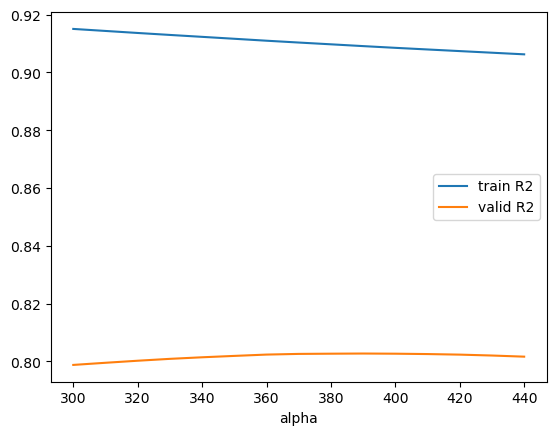

In [55]:
results = pd.DataFrame()
results['alpha'] = (grid['alpha'])
results['train R2'] = lassoCV.cv_results_['mean_train_score']
results['valid R2']  = lassoCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='alpha',y='train R2')
results.plot.line(x='alpha',y='valid R2',ax=ax1)

lasso = lassoCV.best_estimator_
coef = pd.Series(lasso.coef_,index=Xe_train.columns)
coef.sort_values()

# Lasso test R2

In [56]:
print('Test R2: ', lassoCV.score(Xe_test,y_test))

Test R2:  0.8933933404661998


# Use lasso to remove some features

In [77]:
filtered_coef = coef.drop(coef[coef.apply(lambda x: (x < 0.0001) & (x > -0.0001))].index)
filtered_coef

year                                                  19497.090073
length_ft                                             58307.088272
numEngines                                            10739.325052
totalHP                                               30681.331832
year^2                                                13751.826602
                                                         ...      
condition_new fuelType_0                              -2545.380369
condition_new fuelType_diesel                        337539.533625
condition_new engineCategory_outboard                 -5902.681414
fuelType_0 engineCategory_outboard                     -494.336627
fuelType_gasoline engineCategory_inboard-outboard     -1211.686351
Length: 105, dtype: float64

# Optimize random forest for this set

In [78]:
B = np.arange(30, 80, 5)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Xe_train[filtered_coef.index.to_list()],y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))


         best B = {'n_estimators': 35}
  validation R2 = 0.838


# Show optimization

<Axes: xlabel='trees'>

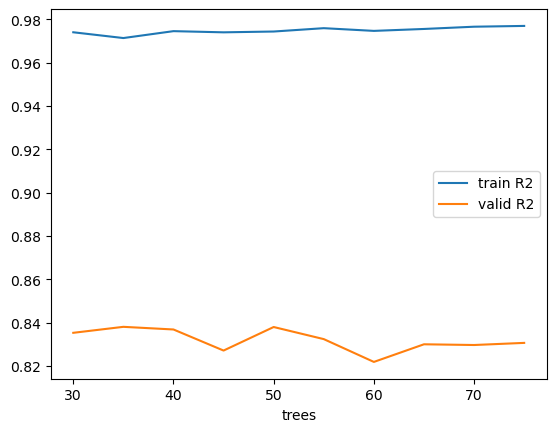

In [79]:
results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])

# Calculate and Show test R2

In [99]:
rf = RandomForestRegressor(n_estimators=35,max_features = 1/3,oob_score=True)
rf.fit(Xe_train[filtered_coef.index.to_list()],y_train)
print('OOB R2:',rf.oob_score_.round(3))
print('TrainR2:', rf.score(Xe_train[filtered_coef.index.to_list()], y_train))
print('TestR2:', rf.score(Xe_test[filtered_coef.index.to_list()], y_test))

OOB R2: 0.846
TrainR2: 0.9768898598427191
TestR2: 0.9414440681219762
